In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
from rlway.pyosrd import OSRD

In [106]:
OSRD.use_cases

['cvg_dvg', 'point_switch', 'station_capacity2', 'straight_line']

In [107]:
use_case='straight_line'
sim = OSRD(use_case=use_case, dir='tmp')

[12:37:18,710] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[12:37:18,741] [INFO]              [FullInfra] parsing infra
[12:37:18,798] [INFO]              [FullInfra] adaptation to kotlin
[12:37:18,824] [INFO]              [FullInfra] loading signals
[12:37:18,830] [INFO]              [FullInfra] building blocks
[12:37:18,834] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[12:37:18,848] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.6
[12:37:18,898] [DEBUG]             [Allowance] computing range n°1
[12:37:18,901] [DEBUG]             [Allowance]   computing section n°1
[12:37:18,901] [DEBUG]             [Allowance]   target time = 210.525
[12:37:18,902] [DEBUG]             [Allowance]     starting attempt 1
[12:37:18,904] [DEBUG]             [Allowance]     envelope time 336.339
[12:37:18,904] [DEBUG]             [Allowance]     starting attempt 2
[12:37:18,904] [DEBUG]             [Allowance]     e

In [108]:
sim.train_track_sections(0)

[{'id': 'T', 'direction': 'START_TO_STOP'}]

In [109]:
sim.space_time_chart_plotly(1, points_to_show=['detector',], eco_or_base='base')

In [110]:
from rlway.schedule_from_osrd import schedule_from_osrd

<Axes: xlabel='Time', ylabel='Track sections'>

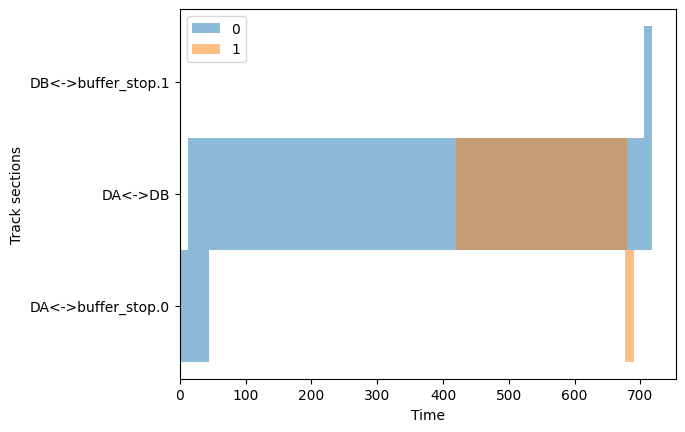

In [111]:
schedule_from_osrd(sim).plot()